In [1]:
import pandas as pd
import numpy as np


# Load the master spreadsheet with ALL of the data
df = pd.read_csv('ammoniatest4(1).csv')

# Ensure time series is sorted by ID and run time
df = df.sort_values(by=['Sample', 'run time'])

# Group by each experimental run
results = []

for sample_id, group in df.groupby('Sample'):
# Extract values - give alias to all columns we want to extract
    time = group['run time'].values # in minutes
    Cin = group['influent mg/m^3'].values #(mg/m3)
    Cout = group['effluent mg/m^3'].values
    Q = group['Flow Rate'].iloc[0] # L/s, assumed constant (lock the first row si
    m = group['mass(g)'].iloc[0] # adsorbent mass in g
    temp = group['Biochar Temp'].iloc[0] #pyrolysis temp (C)
    ptime = group['Time'].iloc[0] #pyrolysis time (min)
    feed = group['Feed'].iloc[0] #Feedstock (WC/R)
    RT = group['Room Temp'].iloc[0] #Room Temperature (C)
    RH = group['Relative Humidity'].iloc[0] #Relative Humidity (%)
    pH = group['pH'].iloc[0] #pH
    Density = group['Density'].iloc[0] #density
    Yield = group['Yield'].iloc[0] #yield
# Calculate the area under the (Cin - Cout) curve over time
    delta_C = Cin - Cout
    adsorbed_mass = Q *(1/1000)* np.trapz(delta_C, x=time) # total adsorbed ma
# Calculate adsorption capacity q (mg adsorbed / g of adsorbent)
    q = adsorbed_mass / m
    results.append({
        'Sample': sample_id,
        'Adsorption Capacity (mg/g)': q,
        'Pyrolysis Temp (C)' : temp,
        'Pyrolysis Time (min)': ptime,
        'Feedstock' : feed,
        'Room Temp (C)': RT,
        'Relative Humidity (%)': RH,
        'pH': pH,
        'Density': Density,
        'Yield': Yield
    })
# Convert to DataFrame for viewing/export <- THIS IS THE DATAFRAME YOU WILL USE FOR
results_df = pd.DataFrame(results)
print(results_df)


             Sample  Adsorption Capacity (mg/g)  Pyrolysis Temp (C)  \
0       R-400-30-AD                   11.694444                 400   
1        R-400-60-A                    8.629250                 400   
2       R-400-60-AD                    7.370563                 400   
3        R-500-15-A                    7.461300                 500   
4   R-500-60-A-M1-B                    5.075875                 500   
5       R-500-60-AD                    9.054500                 500   
6        R-600-15-A                    4.442900                 600   
7       R-600-30-AD                    7.991174                 600   
8       R-600-30-AM                    6.050975                 600   
9       WC-400-15-A                    7.545014                 400   
10     WC-400-15-AD                    3.714646                 400   
11      WC-400-30-A                    5.484500                 400   
12     WC-400-30-AD                    3.180625                 400   
13    

R-squared: 0.246
R-squared1: 0.364


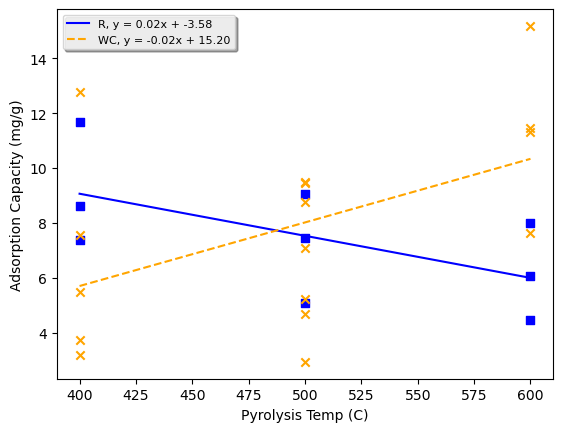

In [2]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data6 = filtered_data['Pyrolysis Temp (C)']

Rregression = np.polyfit(column_data6,column_data5,1)
Rregression3 = np.polyfit(column_data6, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data4 = filtered_data['Pyrolysis Temp (C)']

WCregression = np.polyfit(column_data4,column_data3,1)
WCregression3 = np.polyfit(column_data4, column_data3,2)

from scipy.stats import linregress

slope5, intercept5, r_value5, p_value5, std_err5 = linregress(column_data4, column_data3)

slope6, intercept6, r_value6, P_value6, std_err6 = linregress(column_data6, column_data5)

x5 = f"{slope5:.2f}"
x6 = f"{intercept5:.2f}"
x7 = f"{slope6:.2f}"
x8 = f"{intercept6:.2f}"

r_squared5 = r_value5 ** 2
print(f"R-squared: {r_squared5:.3f}")
r_squared6 = r_value6 ** 2
print(f"R-squared1: {r_squared6:.3f}")

pylab.scatter(column_data6,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data4,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data6,np.polyval(Rregression, column_data6), c = 'b', label = "R, y = {}x + {}".format(x5,x6))
pylab.plot(column_data4,np.polyval(WCregression, column_data4), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x7,x8))
pylab.xlabel('Pyrolysis Temp (C)')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)


R-squared: 0.339
R-squared1: 0.139


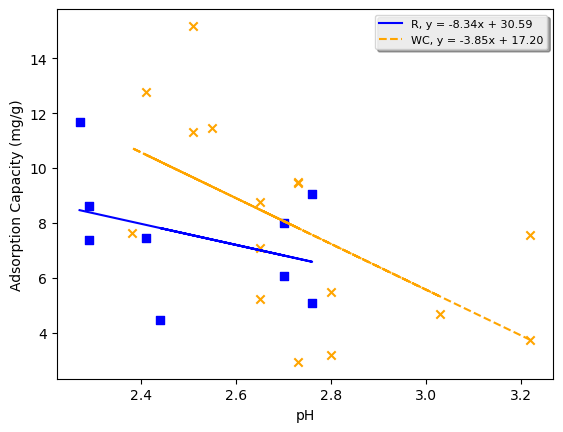

In [10]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data7 = filtered_data['pH']

Rregression2 = np.polyfit(column_data7,column_data5,1)
Rregression3 = np.polyfit(column_data7, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data9 = filtered_data['pH']

WCregression2 = np.polyfit(column_data9,column_data3,1)
WCregression3 = np.polyfit(column_data9, column_data3,2)

from scipy.stats import linregress

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data9, column_data3)

slope4, intercept4, r_value4, P_value4, std_err4 = linregress(column_data7, column_data5)

x1 = f"{slope3:.2f}"
x2 = f"{intercept3:.2f}"
x3 = f"{slope4:.2f}"
x4 = f"{intercept4:.2f}"

r_squared3 = r_value3 ** 2
print(f"R-squared: {r_squared3:.3f}")
r_squared4 = r_value4 ** 2
print(f"R-squared1: {r_squared4:.3f}")

pylab.scatter(column_data7,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data9,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data7,np.polyval(Rregression2, column_data7), c = 'b', label = "R, y = {}x + {}".format(x1,x2))
pylab.plot(column_data9,np.polyval(WCregression2, column_data9), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x3,x4))
pylab.xlabel('pH')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)

In [3]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(column_data4, column_data3)

slope1, intercept1, r_value1, P_value1, std_err1 = linregress(column_data6, column_data5)

print(f"y = {slope:.2f}x + {intercept:.2f}")
print(f"y = {slope1:.2f}x + {intercept1:.2f}")
# R-squared value
r_squared = r_value ** 2
print(f"R-squared: {r_squared:.3f}")
r_squared1 = r_value1 ** 2
print(f"R-squared1: {r_squared1:.3f}")

y = 0.02x + -3.58
y = -0.02x + 15.20
R-squared: 0.246
R-squared1: 0.364


The equation is: y = 0.000x² + -0.065x + 27.355
The equation is: y = 0.000x² + -0.192x + 48.629


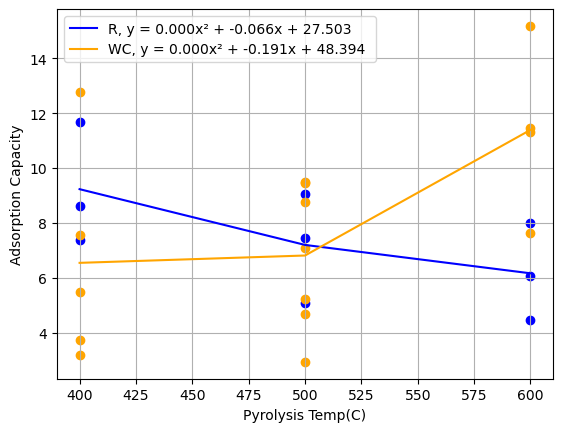

In [4]:
pylab.scatter(column_data6,column_data5, c = 'b')
pylab.scatter(column_data4,column_data3, c = 'orange')
pylab.plot(column_data6,np.polyval(Rregression3, column_data6), c = 'b', label = 'R, y = 0.000x² + -0.066x + 27.503')
pylab.plot(column_data4,np.polyval(WCregression3, column_data4), c = 'orange', label = "WC, y = 0.000x² + -0.191x + 48.394 ")

coefficients = np.polyfit(column_data6,column_data5, 2)
coefficients2 = np.polyfit(column_data4,column_data3, 2)

a, b, c = coefficients
print(f"The equation is: y = {a:.3f}x² + {b:.3f}x + {c:.3f}")

d, e, f = coefficients2
print(f"The equation is: y = {d:.3f}x² + {e:.3f}x + {f:.3f}")




pylab.xlabel('Pyrolysis Temp(C)')
pylab.ylabel('Adsorption Capacity')
pylab.grid()
pylab.legend()


In [5]:
from scipy.stats import linregress

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(column_data18, column_data17)

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data20, column_data19)


print(f"y = {slope2:.2f}x + {intercept2:.2f}")
print(f"y = {slope3:.2f}x + {intercept3:.2f}")
# R-squared value
r_squared2 = r_value2 ** 2
print(f"R-squared2: {r_squared2:.3f}")
r_squared3 = r_value3 ** 2
print(f"R-squared3: {r_squared3:.3f}")

NameError: name 'column_data18' is not defined

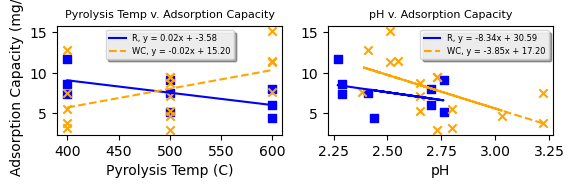

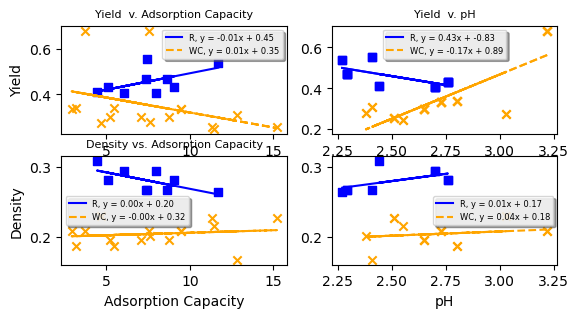

In [12]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data6 = filtered_data['Pyrolysis Temp (C)']

Rregression = np.polyfit(column_data6,column_data5,1)
Rregression3 = np.polyfit(column_data6, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data4 = filtered_data['Pyrolysis Temp (C)']

WCregression = np.polyfit(column_data4,column_data3,1)
WCregression3 = np.polyfit(column_data4, column_data3,2)

from scipy.stats import linregress

slope5, intercept5, r_value5, p_value5, std_err5 = linregress(column_data4, column_data3)

slope6, intercept6, r_value6, P_value6, std_err6 = linregress(column_data6, column_data5)

x5 = f"{slope5:.2f}"
x6 = f"{intercept5:.2f}"
x7 = f"{slope6:.2f}"
x8 = f"{intercept6:.2f}"

r_squared5 = r_value5 ** 2

r_squared6 = r_value6 ** 2


pylab.subplot(3,2,1)
pylab.scatter(column_data6,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data4,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data6,np.polyval(Rregression, column_data6), c = 'b', label = "R, y = {}x + {}".format(x5,x6))
pylab.plot(column_data4,np.polyval(WCregression, column_data4), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x7,x8))
pylab.xlabel('Pyrolysis Temp (C)')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)
pylab.title("Pyrolysis Temp v. Adsorption Capacity", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data7 = filtered_data['pH']

Rregression2 = np.polyfit(column_data7,column_data5,1)
Rregression3 = np.polyfit(column_data7, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data9 = filtered_data['pH']

WCregression2 = np.polyfit(column_data9,column_data3,1)
WCregression3 = np.polyfit(column_data9, column_data3,2)

from scipy.stats import linregress

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data9, column_data3)

slope4, intercept4, r_value4, P_value4, std_err4 = linregress(column_data7, column_data5)

x1 = f"{slope3:.2f}"
x2 = f"{intercept3:.2f}"
x3 = f"{slope4:.2f}"
x4 = f"{intercept4:.2f}"

r_squared3 = r_value3 ** 2

r_squared4 = r_value4 ** 2


pylab.subplot(3,2,2)
pylab.scatter(column_data7,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data9,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data7,np.polyval(Rregression2, column_data7), c = 'b', label = "R, y = {}x + {}".format(x1,x2))
pylab.plot(column_data9,np.polyval(WCregression2, column_data9), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x3,x4))
pylab.xlabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)
pylab.title("pH v. Adsorption Capacity", fontsize = 8)
pylab.show()

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data15 = filtered_data['Yield']
column_data16 = filtered_data['Adsorption Capacity (mg/g)']

Rregression11 = np.polyfit(column_data16,column_data15,1)
Rregression13 = np.polyfit(column_data16, column_data15,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data13 = filtered_data['Yield']
column_data14 = filtered_data['Adsorption Capacity (mg/g)']

WCregression11 = np.polyfit(column_data14,column_data13,1)
WCregression13 = np.polyfit(column_data14, column_data13,2)

from scipy.stats import linregress

slope8, intercept8, r_value8, p_value8, std_err8 = linregress(column_data14, column_data13)

slope9, intercept9, r_value9, P_value9, std_err9 = linregress(column_data16, column_data15)

x9 = f"{slope8:.2f}"
x10 = f"{intercept8:.2f}"
x11 = f"{slope9:.2f}"
x12 = f"{intercept9:.2f}"

r_squared8 = r_value8 ** 2

r_squared9 = r_value9 ** 2


pylab.subplot(3,2,3)
pylab.scatter(column_data16,column_data15, c = 'b', marker = 's')
pylab.scatter(column_data14,column_data13, c = 'orange', marker = 'x')
pylab.plot(column_data16,np.polyval(Rregression11, column_data16), c = 'b', label = "R, y = {}x + {}".format(x9,x10))
pylab.plot(column_data14,np.polyval(WCregression11, column_data14), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x11,x12))
pylab.xlabel('Adsorption Capacity')
pylab.ylabel('Yield')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)
pylab.title("Yield  v. Adsorption Capacity", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data21 = filtered_data['Yield']
column_data22 = filtered_data['pH']

Rregression21 = np.polyfit(column_data22,column_data21,1)
Rregression23 = np.polyfit(column_data22, column_data21,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data23 = filtered_data['Yield']
column_data24 = filtered_data['pH']

WCregression21 = np.polyfit(column_data24,column_data23,1)
WCregression23 = np.polyfit(column_data24, column_data23,2)

from scipy.stats import linregress

slope11, intercept11, r_value11, p_value11, std_err11 = linregress(column_data24, column_data23)

slope12, intercept12, r_value12, P_value12, std_err12 = linregress(column_data22, column_data21)

x14 = f"{slope11:.2f}"
x15 = f"{intercept11:.2f}"
x16 = f"{slope12:.2f}"
x17 = f"{intercept12:.2f}"

r_squared8 = r_value11 ** 2

r_squared9 = r_value12 ** 2


pylab.subplot(3,2,4)
pylab.scatter(column_data22,column_data21, c = 'b', marker = 's')
pylab.scatter(column_data24,column_data23, c = 'orange', marker = 'x')
pylab.plot(column_data22,np.polyval(Rregression21, column_data22), c = 'b', label = "R, y = {}x + {}".format(x14,x15))
pylab.plot(column_data24,np.polyval(WCregression21, column_data24), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x16,x17))
pylab.xlabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)
pylab.title("Yield  v. pH", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data21 = filtered_data['Yield']
column_data22 = filtered_data['pH']

Rregression21 = np.polyfit(column_data22,column_data21,1)
Rregression23 = np.polyfit(column_data22, column_data21,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data23 = filtered_data['Yield']
column_data24 = filtered_data['pH']

WCregression21 = np.polyfit(column_data24,column_data23,1)
WCregression23 = np.polyfit(column_data24, column_data23,2)

from scipy.stats import linregress

slope14, intercept14, r_value14, p_value14, std_err14 = linregress(column_data24, column_data23)

slope14, intercept14, r_value14, P_value14, std_err14 = linregress(column_data22, column_data21)

x34 = f"{slope14:.2f}"
x35 = f"{intercept14:.2f}"
x36 = f"{slope14:.2f}"
x37 = f"{intercept14:.2f}"

r_squared8 = r_value11 ** 2

r_squared9 = r_value12 ** 2


pylab.subplot(3,2,4)
pylab.scatter(column_data22,column_data21, c = 'b', marker = 's')
pylab.scatter(column_data24,column_data23, c = 'orange', marker = 'x')
pylab.plot(column_data22,np.polyval(Rregression21, column_data22), c = 'b', label = "R, y = {}x + {}".format(x34,x35))
pylab.plot(column_data24,np.polyval(WCregression21, column_data24), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x36,x37))
pylab.xlabel('pH')
pylab.title("Yield  v. pH", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data41 = filtered_data['Density']
column_data42 = filtered_data['Adsorption Capacity (mg/g)']

Rregression41 = np.polyfit(column_data42,column_data41,1)
Rregression43 = np.polyfit(column_data42, column_data41,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data43 = filtered_data['Density']
column_data44 = filtered_data['Adsorption Capacity (mg/g)']

WCregression41 = np.polyfit(column_data44,column_data43,1)
WCregression43 = np.polyfit(column_data44, column_data43,2)

from scipy.stats import linregress

slope41, intercept41, r_value41, p_value41, std_err41 = linregress(column_data44, column_data43)

slope42, intercept42, r_value42, P_value42, std_err42 = linregress(column_data42, column_data41)

x44 = f"{slope41:.2f}"
x45 = f"{intercept41:.2f}"
x46 = f"{slope42:.2f}"
x47 = f"{intercept42:.2f}"

r_squared8 = r_value11 ** 2

r_squared9 = r_value12 ** 2


pylab.subplot(3,2,5)
pylab.scatter(column_data42,column_data41, c = 'b', marker = 's')
pylab.scatter(column_data44,column_data43, c = 'orange', marker = 'x')
pylab.plot(column_data42,np.polyval(Rregression41, column_data42), c = 'b', label = "R, y = {}x + {}".format(x44,x45))
pylab.plot(column_data44,np.polyval(WCregression41, column_data44), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x46,x47))
pylab.xlabel('Adsorption Capacity')
pylab.ylabel('Density')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)
pylab.title("Density vs. Adsorption Capacity", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data51 = filtered_data['Density']
column_data52 = filtered_data['pH']

Rregression51 = np.polyfit(column_data52,column_data51,1)
Rregression53 = np.polyfit(column_data52, column_data51,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data53 = filtered_data['Density']
column_data54 = filtered_data['pH']

WCregression51 = np.polyfit(column_data54,column_data53,1)
WCregression53 = np.polyfit(column_data54, column_data53,2)

from scipy.stats import linregress

slope51, intercept51, r_value51, p_value51, std_err51 = linregress(column_data54, column_data53)

slope52, intercept52, r_value52, P_value52, std_err52 = linregress(column_data52, column_data51)

x54 = f"{slope51:.2f}"
x55 = f"{intercept51:.2f}"
x56 = f"{slope52:.2f}"
x57 = f"{intercept52:.2f}"

r_squared58 = r_value51 ** 2

r_squared59 = r_value52 ** 2


pylab.subplot(3,2,6)
pylab.scatter(column_data52,column_data51, c = 'b', marker = 's')
pylab.scatter(column_data54,column_data53, c = 'orange', marker = 'x')
pylab.plot(column_data52,np.polyval(Rregression51, column_data52), c = 'b', label = "R, y = {}x + {}".format(x54,x55))
pylab.plot(column_data54,np.polyval(WCregression51, column_data54), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x56,x57))
pylab.xlabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 6)


Text(0.5, 1.0, 'pH vs Density')

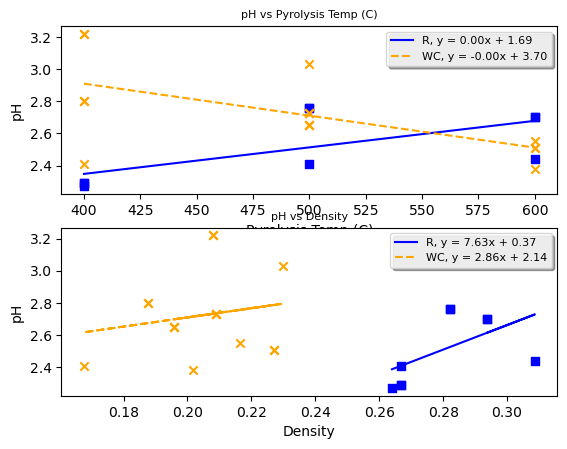

In [28]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data35 = filtered_data['pH']
column_data36 = filtered_data['Pyrolysis Temp (C)']

Rregression32 = np.polyfit(column_data36,column_data35,1)
Rregression33 = np.polyfit(column_data36, column_data35,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data33 = filtered_data['pH']
column_data34 = filtered_data['Pyrolysis Temp (C)']

WCregression32 = np.polyfit(column_data34,column_data33,1)
WCregression33 = np.polyfit(column_data34, column_data33,2)

from scipy.stats import linregress

slope35, intercept35, r_value35, p_value35, std_err35 = linregress(column_data36, column_data35)

slope36, intercept36, r_value36, P_value36, std_err36 = linregress(column_data34, column_data33)

x20 = f"{slope35:.2f}"
x21 = f"{intercept35:.2f}"
x22 = f"{slope36:.2f}"
x23 = f"{intercept36:.2f}"

r_squared35 = r_value5 ** 2

r_squared36 = r_value6 ** 2

pylab.subplot(2,1,1)
pylab.scatter(column_data36,column_data35, c = 'b', marker = 's')
pylab.scatter(column_data34,column_data33, c = 'orange', marker = 'x')
pylab.plot(column_data36,np.polyval(Rregression32, column_data36), c = 'b', label = "R, y = {}x + {}".format(x20,x21))
pylab.plot(column_data34,np.polyval(WCregression32, column_data34), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x22,x23))
pylab.xlabel('Pyrolysis Temp (C)')
pylab.ylabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)
pylab.title("pH vs Pyrolysis Temp (C)", fontsize = 8)

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data39 = filtered_data['pH']
column_data40 = filtered_data['Density']

Rregression39 = np.polyfit(column_data40,column_data39,1)
Rregression40 = np.polyfit(column_data40, column_data39,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data37 = filtered_data['pH']
column_data38 = filtered_data['Density']

WCregression37 = np.polyfit(column_data38,column_data37,1)
WCregression38 = np.polyfit(column_data38, column_data37,2)

from scipy.stats import linregress

slope37, intercept37, r_value37, p_value37, std_err37 = linregress(column_data40, column_data39)

slope38, intercept38, r_value38, P_value38, std_err38 = linregress(column_data38, column_data37)

x24 = f"{slope37:.2f}"
x25 = f"{intercept37:.2f}"
x26 = f"{slope38:.2f}"
x27 = f"{intercept38:.2f}"

r_squared37 = r_value37 ** 2

r_squared38 = r_value38 ** 2

pylab.subplot(2,1,2)
pylab.scatter(column_data40,column_data39, c = 'b', marker = 's')
pylab.scatter(column_data38,column_data37, c = 'orange', marker = 'x')
pylab.plot(column_data40,np.polyval(Rregression39, column_data40), c = 'b', label = "R, y = {}x + {}".format(x24,x25))
pylab.plot(column_data38,np.polyval(WCregression37, column_data38), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x26,x27))
pylab.xlabel('Density')
pylab.ylabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)
pylab.title("pH vs Density", fontsize = 8)





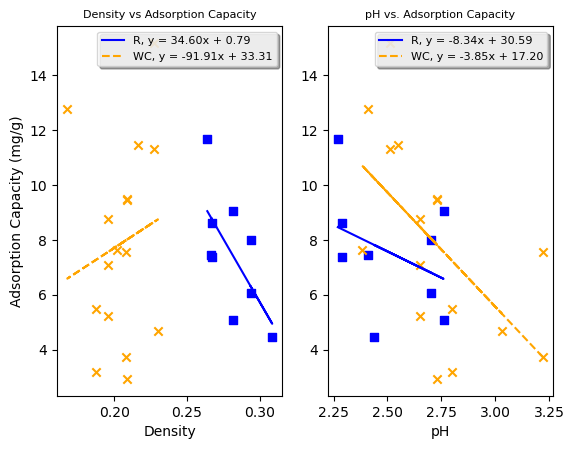

In [24]:
import pylab

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data6 = filtered_data['Density']

Rregression = np.polyfit(column_data6,column_data5,1)
Rregression3 = np.polyfit(column_data6, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data4 = filtered_data['Density']

WCregression = np.polyfit(column_data4,column_data3,1)
WCregression3 = np.polyfit(column_data4, column_data3,2)

from scipy.stats import linregress

slope5, intercept5, r_value5, p_value5, std_err5 = linregress(column_data4, column_data3)

slope6, intercept6, r_value6, P_value6, std_err6 = linregress(column_data6, column_data5)

x5 = f"{slope5:.2f}"
x6 = f"{intercept5:.2f}"
x7 = f"{slope6:.2f}"
x8 = f"{intercept6:.2f}"

r_squared5 = r_value5 ** 2

r_squared6 = r_value6 ** 2


pylab.subplot(1,2,1)
pylab.scatter(column_data6,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data4,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data6,np.polyval(Rregression, column_data6), c = 'b', label = "R, y = {}x + {}".format(x5,x6))
pylab.plot(column_data4,np.polyval(WCregression, column_data4), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x7,x8))
pylab.xlabel('Density')
pylab.ylabel('Adsorption Capacity (mg/g)')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)
pylab.title("Density vs Adsorption Capacity", fontsize = 8)

column_data1 = results_df['Feedstock']
column_data2 = results_df['Adsorption Capacity (mg/g)']

target_id = 'R'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data5 = filtered_data['Adsorption Capacity (mg/g)']
column_data7 = filtered_data['pH']

Rregression2 = np.polyfit(column_data7,column_data5,1)
Rregression3 = np.polyfit(column_data7, column_data5,2)

target_id = 'WC'

filtered_data = results_df[results_df['Feedstock'] == target_id]

column_data3 = filtered_data['Adsorption Capacity (mg/g)']
column_data9 = filtered_data['pH']

WCregression2 = np.polyfit(column_data9,column_data3,1)
WCregression3 = np.polyfit(column_data9, column_data3,2)

from scipy.stats import linregress

slope3, intercept3, r_value3, p_value3, std_err3 = linregress(column_data9, column_data3)

slope4, intercept4, r_value4, P_value4, std_err4 = linregress(column_data7, column_data5)

x1 = f"{slope3:.2f}"
x2 = f"{intercept3:.2f}"
x3 = f"{slope4:.2f}"
x4 = f"{intercept4:.2f}"

r_squared3 = r_value3 ** 2

r_squared4 = r_value4 ** 2


pylab.subplot(1,2,2)
pylab.scatter(column_data7,column_data5, c = 'b', marker = 's')
pylab.scatter(column_data9,column_data3, c = 'orange', marker = 'x')
pylab.plot(column_data7,np.polyval(Rregression2, column_data7), c = 'b', label = "R, y = {}x + {}".format(x1,x2))
pylab.plot(column_data9,np.polyval(WCregression2, column_data9), c = 'orange', linestyle = '--', label = "WC, y = {}x + {}".format(x3,x4))
pylab.xlabel('pH')
pylab.legend(fancybox=True, shadow=True, framealpha = 0.8, fontsize = 8)
pylab.title("pH vs. Adsorption Capacity", fontsize = 8)
pylab.show()